In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from matplotlib import rcParams
from ipywidgets import interact, widgets
import plotly.graph_objs as go
from IPython.display import display
from datetime import datetime
from metpy.units import units
from metpy.calc import specific_humidity_from_dewpoint 


In [2]:
cd

/Users/alondraalvarez


In [3]:
cd Desktop/REU 2025

/Users/alondraalvarez/Desktop/REU 2025


In [4]:
site = "S2"
path = f"{site}_data/30_min_CO2_aerosols/"
data = pd.read_csv(path + f"{site}_30_min_meteorological_CO2_aerosol_data.csv")

In [5]:
data['time'] = pd.to_datetime(data['time'])

df_morning = data[
    ((data['time'].dt.hour == 4)) |
    ((data['time'].dt.hour == 5)) |
    ((data['time'].dt.hour == 6)) |
    ((data['time'].dt.hour == 7)) |
    ((data['time'].dt.hour == 8)) |
    ((data['time'].dt.hour == 9)) |
    ((data['time'].dt.hour == 10)) |
    ((data['time'].dt.hour == 11)) |
    ((data['time'].dt.hour == 12)) |
    ((data['time'].dt.hour == 13) & (data['time'].dt.minute == 0))]

df_evening = data[
    ((data['time'].dt.hour == 15)) |
    ((data['time'].dt.hour == 16)) |
    ((data['time'].dt.hour == 17)) |
    ((data['time'].dt.hour == 18)) |
    ((data['time'].dt.hour == 19)) |
    ((data['time'].dt.hour == 20)) | 
    ((data['time'].dt.hour == 21)) |
    ((data['time'].dt.hour == 22)) |
    ((data['time'].dt.hour == 23)) |
    ((data['time'].dt.hour == 1) & (data['time'].dt.minute == 0))]

In [6]:
df_morning

,time,precipitation,relative humidity,temperature,atmospheric pressure,wind speed,co2 flux,co2 molar density,co2 molar fraction,co2 timelag,...,evapotranspiration flux,water vapor density,co2 spec. humidity (meas),co2 relative humidity,co2 latent flux,total number conc,total count,total count std,total volume PSL,total surface area
8,2024-12-01 04:00:00,0.0,81.181724,-7.534897,100.10,0.553690,0.100755,19.9464,438.376,0.5,...,0.000017,0.002080,0.001579,76.9848,0.011595,1243.524260,3719.338207,67.793333,1.360584e+08,6.587769e+09
9,2024-12-01 04:30:00,0.0,82.813333,-7.679200,100.10,0.765967,-1.583430,20.0655,440.684,0.0,...,0.000791,0.002026,0.001538,76.1185,0.554638,1244.266363,3722.566020,111.144578,1.416740e+08,6.211825e+09
10,2024-12-01 05:00:00,0.0,84.624138,-8.015690,100.10,0.503793,-0.641504,20.1218,441.427,0.0,...,-0.000847,0.002029,0.001538,77.7118,-0.593871,1355.968837,4054.707967,96.887550,1.584680e+08,7.021814e+09
11,2024-12-01 05:30:00,0.0,86.823333,-8.059300,100.10,0.546300,-2.381100,20.3322,445.616,0.0,...,0.001632,0.002018,0.001528,78.7757,1.144020,1408.599330,4212.685093,111.518278,1.534246e+08,6.623467e+09
12,2024-12-01 06:00:00,0.0,86.855172,-8.314966,100.10,0.691862,2.150870,20.3207,445.544,-0.3,...,-0.000302,0.002040,0.001546,79.2590,-0.211556,1485.301640,4443.250637,105.020802,1.574967e+08,6.558701e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8614,2025-06-11 11:00:00,0.0,98.527586,15.981379,100.00,0.277483,-16.268700,27.3050,650.895,0.0,...,0.111026,0.009998,0.008270,83.2520,76.168500,524.308331,801.531254,27.375630,3.580493e+07,1.071557e+09
8615,2025-06-11 11:30:00,0.0,91.000000,17.798667,100.07,0.400400,-2.655360,23.7980,570.522,0.5,...,0.055053,0.012695,0.010575,95.4153,37.707900,532.801554,797.603562,27.620502,3.629943e+07,1.036532e+09
8616,2025-06-11 12:00:00,0.0,81.020690,19.640345,100.10,0.560931,-20.065600,21.3267,514.688,-0.3,...,0.073484,0.013348,0.011198,88.6749,50.232200,523.687775,783.225246,26.836392,3.548546e+07,1.005489e+09
8617,2025-06-11 12:30:00,0.0,72.992333,21.205000,100.10,0.911767,-14.229200,19.4761,472.979,0.0,...,0.156682,0.013405,0.011317,79.2913,106.902000,494.248744,716.941046,26.170138,3.321625e+07,9.196847e+08


In [7]:
df_morning['co2 flux']

8        0.100755
9       -1.583430
10      -0.641504
11      -2.381100
12       2.150870
          ...    
8614   -16.268700
8615    -2.655360
8616   -20.065600
8617   -14.229200
8618    -3.352110
Name: co2 flux, Length: 3420, dtype: float64

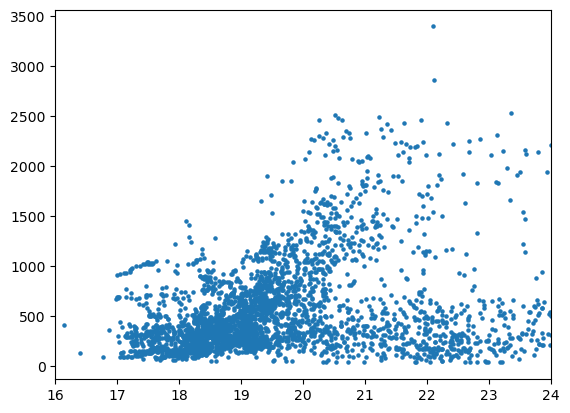

In [8]:
plt.scatter(df_morning['co2 molar density'], df_morning['total number conc'], s= 5)
plt.xlim(16,24)
plt.show()

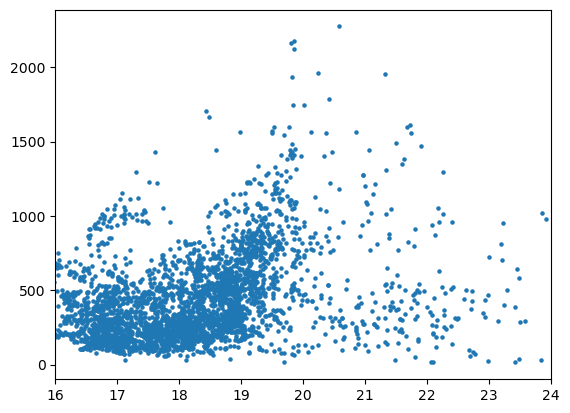

In [9]:
plt.scatter(df_evening['co2 molar density'], df_evening['total number conc'], s= 5)
plt.xlim(16,24)
plt.show()

# Create Tables

In [14]:

data['time'] = pd.to_datetime(data['time'])
data = data.sort_values('time')

# Define función para agrupar bloques de 10 horas completos
def get_10hr_blocks(df, start_hour, label):
    summaries = []
    
    # Agrupar por día
    for date in df['time'].dt.normalize().unique():
        date = pd.to_datetime(date)
        
        if label == 'morning':
            start = date + pd.Timedelta(hours=start_hour)  # 4 AM
            end = start + pd.Timedelta(hours=10)           # 2 PM
        elif label == 'evening':
            start = date + pd.Timedelta(hours=start_hour)  # 3 PM
            end = start + pd.Timedelta(hours=10)           # 1 AM (next day)

        block = df[(df['time'] >= start) & (df['time'] < end)]

        expected_intervals = int((end - start) / pd.Timedelta(minutes=30))

        if len(block) == expected_intervals:
            summaries.append({
                'period': label,
                'start_time': start,
                'end_time': end,
                'duration_hours': 10,
                'avg_precip': round(block['precipitation'].mean(), 3)
            })
    
    return pd.DataFrame(summaries)

# Crear resúmenes por separado
morning_summary = get_10hr_blocks(data, start_hour=4, label='morning')
evening_summary = get_10hr_blocks(data, start_hour=16, label='evening')

# Guardar por separado
morning_summary.to_csv(path + f'{site}_resumen_morning_10h.csv', index=False)
evening_summary.to_csv(path + f'{site}_resumen_night_10h.csv', index=False)

# Mostrar resumen
print("Resumen morning:")
print(morning_summary.head())
print("\nResumen evening:")
print(evening_summary.head())


Resumen morning:
    period          start_time            end_time  duration_hours  avg_precip
0  morning 2024-12-01 04:00:00 2024-12-01 14:00:00              10       0.000
1  morning 2024-12-02 04:00:00 2024-12-02 14:00:00              10       0.000
2  morning 2024-12-03 04:00:00 2024-12-03 14:00:00              10       0.000
3  morning 2024-12-04 04:00:00 2024-12-04 14:00:00              10       0.000
4  morning 2024-12-05 04:00:00 2024-12-05 14:00:00              10       0.034

Resumen evening:
    period          start_time            end_time  duration_hours  avg_precip
0  evening 2024-12-01 16:00:00 2024-12-02 02:00:00              10         0.0
1  evening 2024-12-02 16:00:00 2024-12-03 02:00:00              10         0.0
2  evening 2024-12-03 16:00:00 2024-12-04 02:00:00              10         0.0
3  evening 2024-12-04 16:00:00 2024-12-05 02:00:00              10         0.0
4  evening 2024-12-05 16:00:00 2024-12-06 02:00:00              10         0.0


In [6]:
morning_data = pd.read_csv(path + f'Morning/{site}_resumen_morning_10h.csv')
night_data = pd.read_csv(path + f'Morning/{site}_resumen_morning_10h.csv')

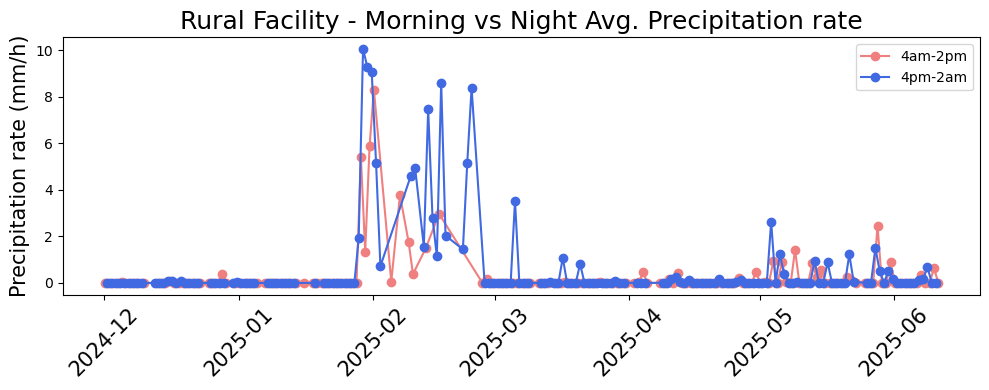

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer archivos
morning_data = pd.read_csv(path + f'Morning/{site}_resumen_morning_10h.csv', parse_dates=['start_time'])
night_data = pd.read_csv(path + f'Night/{site}_resumen_night_10h.csv', parse_dates=['start_time'])

# Graficar
plt.figure(figsize=(10, 4))

plt.plot(morning_data['start_time'], morning_data['avg_precip'], 'o-', label='4am-2pm', color='lightcoral')
plt.plot(night_data['start_time'], night_data['avg_precip'], 'o-', label='4pm-2am', color='royalblue')

#plt.xlabel('Time', fontsize=15)
plt.ylabel("Precipitation rate (mm/h)", fontsize=15)
plt.title(f'Rural Facility - Morning vs Night Avg. Precipitation rate', fontsize=18)
plt.xticks(rotation=45, fontsize=15)
plt.legend()
plt.tight_layout()
plt.show()
